In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [2]:
directory = f'/Users/lilimatic/greenspace'
os.chdir(directory)

In [3]:
from functions.function import table_creator
from functions.data import df

In [4]:
book = 'personal'

In [5]:
len(df)

400

## Descriptive statistics

This survey consists of 13 questions answered by n= 400 participants. Split by gender, 67.5 % of the participants are female and 32.5 % are male. The average respondent roughly 35 years old. Precisely, most attendants are between 25-40 years old (39.8 %). Younger participants, aged 24 years or less, form 29.2 % of the population. The remaining 31.0 % are participants between 41-64 years of age. The demographic structure is summarized in Table x and Table y. 

In [6]:
print(str(len(df.columns))+' questions and n = '+ str(len(df))+' participants')

13 questions and n = 400 participants


## Gender and age of survey participants

In [7]:
personal = ['Gender', 'Age ']

In [8]:
for a in personal:
    print('\033[95m' + '\033[1m' + a+ '\033[0m')
    table_creator(df,a,book)
    display(table_creator(df,a,book))

Gender


,count,%
Female,270,67.5
Male,130,32.5


Age 


,count,%
25-40,159,39.8
41-64,124,31.0
15-24,117,29.2


In [10]:
#Computation of average 
vc = df['Age '].value_counts().to_frame("counts").reset_index().rename(columns={"index": "age"})
vc["mean"] = [np.mean(list(map(int, x.split('-')))) for x in vc["age"]]
vc["weight"] = vc["counts"] / np.sum(vc["counts"])
print('The average respondent age is ' + str(round(np.sum(vc["mean"] * vc["weight"]),2)))

#Average gender class mean 

gender = ['Female','Male']

for x in gender:
    vc = df[df['Gender'] ==  x]['Age '].value_counts().to_frame("counts").reset_index().rename(columns={"index": "age"})
    vc["mean"] = [np.mean(list(map(int, x.split('-')))) for x in vc["age"]]
    vc["weight"] = vc["counts"] / np.sum(vc["counts"])
    print('The average ' +x + ' respondent age is ' + str(round(np.sum(vc["mean"] * vc["weight"]),2)))

The average respondent age is 34.9
The average Female respondent age is 35.17
The average Male respondent age is 34.34


Gender


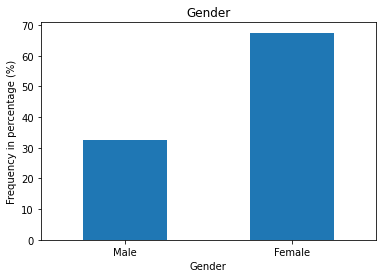

Age 


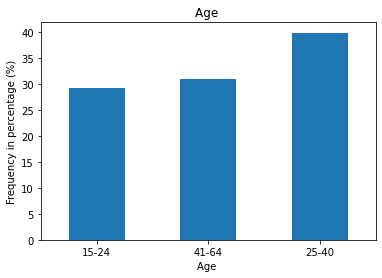

In [11]:
for x in personal:
    print('\033[94m' + '\033[1m' + x+ '\033[0m')
    fig = plt.figure()
    ax = df[x].value_counts(ascending=True,normalize=True).mul(100).round(1).plot(kind='bar',title=x)
    #np.round(df[x].value_counts(ascending=True,normalize=True)*100,2).to_csv('descriptive/demographic/'+x+'_relative.csv')
    #df[x].value_counts(ascending=True).to_csv('descriptive/demographic/'+x+'_absolute.csv')
    my_cmap = cm.get_cmap('jet')
    ax.set_xlabel(x)
    ax.set_ylabel('Frequency in percentage (%)')
    plt.xticks(rotation=360)
    plt.show()
    fig.savefig('images/personal/' + x +'.png')